In [ ]:
# 성능확인

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)

target = wine.target
feature = wine.data


train_input, test_input, train_target, test_target = train_test_split(feature,
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=42)

Best Hyper-parameters : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score : 0.9929577464788732


Text(0.5, 1.0, 'Feature Importance')

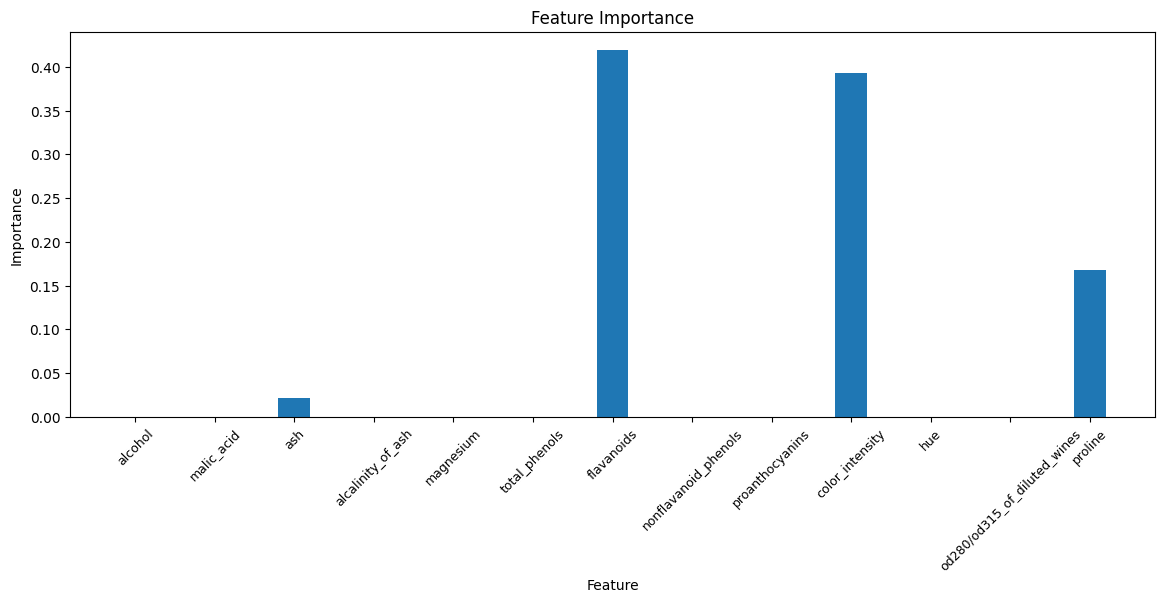

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params_DC = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2,3,4,5], 'min_samples_split' : [2,5,10], 'min_samples_leaf' : [1,2,4]}
gs_DT = GridSearchCV(DecisionTreeClassifier(random_state = 42), params_DC, scoring='accuracy') 


gs_DT.fit(train_input, train_target)

DT = gs_DT.best_estimator_ 

importances_DT = DT.feature_importances_

importances_DT_df = pd.DataFrame({'features': df.columns, 'importance': importances_DT})
importances_DT_df.sort_index(inplace = True)

print(f"Best Hyper-parameters : {gs_DT.best_params_}")  
print(f"Best Score : {DT.score(train_input, train_target)}") 
plt.figure(figsize = (14,5))
plt.bar(importances_DT_df.features, importances_DT_df.importance, width = 0.4)
plt.xticks(rotation = 45, size = 9)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')


Beest Hyper-parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score : 1.0


Text(0.5, 1.0, 'Feature Importance')

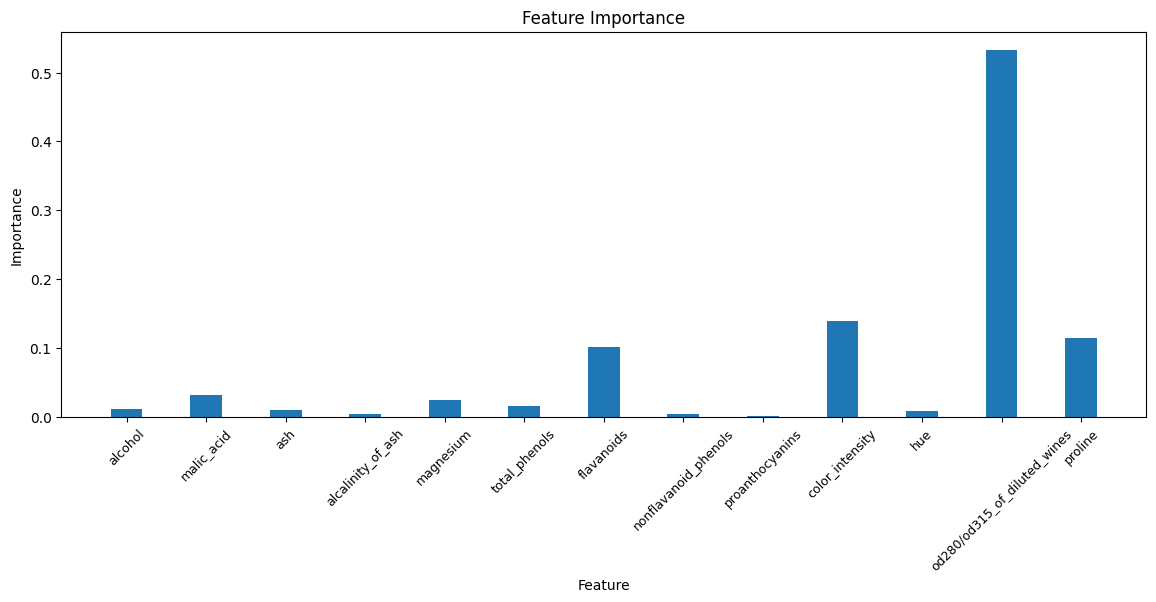

In [9]:
from xgboost.sklearn import XGBClassifier

params_XGB = { 'max_depth' : [3, 5, 7, 9, 15],'learning_rate' : [0.1, 0.01, 0.001], 'n_estimators' : [50, 100, 200, 300]}
gs_XGB = GridSearchCV(XGBClassifier(random_state = 42), params_XGB, scoring='accuracy')
gs_XGB.fit(train_input, train_target)

XGB = gs_XGB.best_estimator_

importances_XGB = XGB.feature_importances_

importances_XGB_df = pd.DataFrame({'features': df.columns, 'importance': importances_XGB})
importances_XGB_df.sort_index(inplace = True)

print(f"Beest Hyper-parameters : {gs_XGB.best_params_}") 
print(f"Best Score : {XGB.score(train_input, train_target)}")
plt.figure(figsize = (14,5))
plt.bar(importances_XGB_df.features, importances_XGB_df.importance, width = 0.4)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation = 45,size = 9)
plt.title('Feature Importance')


==================== DT 성능 확인 ====================
DT accuracy : 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


==================== XGB 성능 확인 ====================
XGB accuracy : 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36




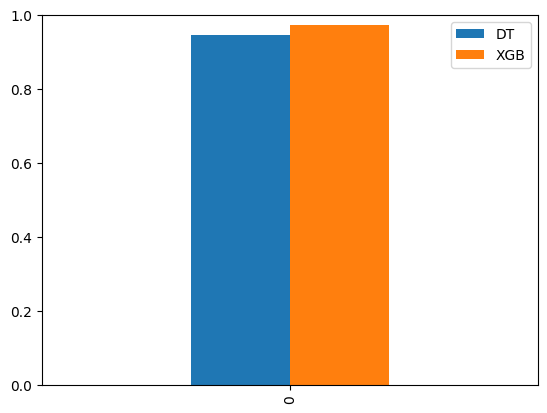

In [11]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

DT_pred = DT.predict(test_input)
print('=' *20, 'DT 성능 확인', '='*20)
print('DT accuracy :', accuracy_score(test_target, DT_pred)) 
print(classification_report(test_target, DT_pred))
print()

XGB_pred = XGB.predict(test_input)
print('=' *20, 'XGB 성능 확인', '='*20)
print('XGB accuracy :', accuracy_score(test_target, XGB_pred))
print(classification_report(test_target, XGB_pred))
print()

accuracy_table = pd.DataFrame({
    'model':['DT', 'XGB'], 
    'accuracy_score' : [accuracy_score(test_target, DT_pred), accuracy_score(test_target, XGB_pred)]
})


fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0.5], labels = '0')
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xticks(rotation = 90)

plt.bar(0.4, accuracy_table['accuracy_score'][0], width = 0.2, label = 'DT')
plt.bar(0.6, accuracy_table['accuracy_score'][1], width = 0.2, label = 'XGB')
plt.legend(loc = 'upper right')
